In [3]:
cd ..

/home/mushahid/Desktop/project/cpenprojec/UnsupGenModbyMPS


In [9]:
import jax.numpy as jnp
from pennylane import numpy as pnp
import random_and_near_identity_circuit as random_and_near_identity_circuit
import matplotlib.pyplot as plt
from MPScumulant import MPS_c


In [5]:
weights_and_losses_for_chis = {}

## Initial Weights: Either Randomly Assigned With No Restrictions or Weights Near Unitary

In [6]:
weights_random = jnp.array(pnp.random.normal(size=(88, 15), requires_grad=True))

weights_near_unitary = jnp.array(pnp.random.uniform(low = -0.01, high=0.01, size=(88, 15), requires_grad=True))

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [ ]:
random_initialized_circuit = random_and_near_identity_circuit.get_random_initialized_circuit(weights_random)
near_unitary_initialized_circuit = random_and_near_identity_circuit.get_random_initialized_circuit(weights_near_unitary)

weights_random_updated, loss_track_random = random_and_near_identity_circuit.train_model(weights_random)
weights_near_unitary_updated, loss_track_near_unitary = random_and_near_identity_circuit.train_model(weights_near_unitary)

weights_and_losses_for_chis['Random Initialization'] = [weights_random_updated, loss_track_random]
weights_and_losses_for_chis['Near Identity Initialization'] = [weights_near_unitary_updated, loss_track_near_unitary]


## Extending Circuit Generate by MPS

In [ ]:
chis = ['BStest/BS_project-2-MPS', 'BStest/BS_project-4-MPS', 'BStest/BS_project-8-MPS']
labels = ["Chi = 2 MPS", "Chi = 4 MPS", "Chi = 8 MPS"]
maxi_bonds = [2, 4, 8]
for i in range(len(chis)):
    random_and_near_identity_circuit.maxi_bond = maxi_bonds[i]
    random_and_near_identity_circuit.chi = chis[i]
    random_and_near_identity_circuit.mps = MPS_c(12, max_bond_dim=maxi_bonds[i])

    data_states = random_and_near_identity_circuit.get_data_states("BStest/b_s_4_3.npy", 12)

    unitary_list = random_and_near_identity_circuit.get_unitaries()
    num_weights = random_and_near_identity_circuit.count_number_of_weights(unitary_list)
    weights = jnp.array(pnp.random.normal(size=(num_weights, 15), requires_grad=True))

    weights_extended, loss_track_extended = random_and_near_identity_circuit.train_model(weights, circuit_type="mps_extended")
    weights_and_losses_for_chis[labels[i]] = [weights_extended, loss_track_extended]

## Plots


Random Initialization
Near Identity Initialization
Chi = 2 MPS
Chi = 4 MPS
Chi = 8 MPS


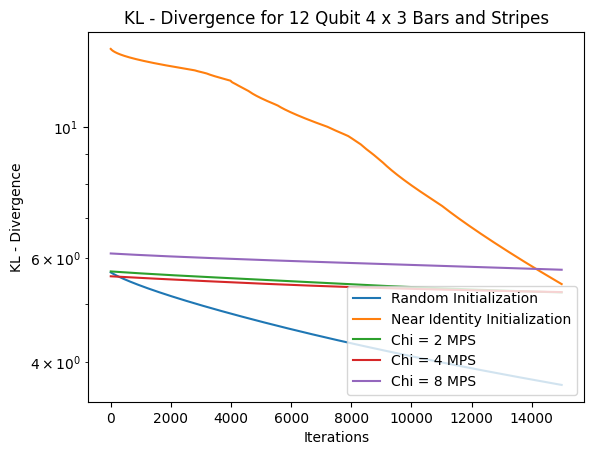

In [12]:
for key in weights_and_losses_for_chis:
    temp = []
    
    for loss in weights_and_losses_for_chis[key][1]:
        temp.append(float(loss))    
    plt.yscale('log')
    plt.plot(temp, label=key)
plt.title('KL - Divergence for 12 Qubit 4 x 3 Bars and Stripes')
plt.xlabel('Iterations')
plt.ylabel('KL - Divergence')
plt.legend(loc="lower right")
plt.show()